# Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import os

# Visualization
import matplotlib.pyplot as plt
#from skimage.io import imshow

from skimage import color
from skimage import io


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics


# Datasets
from sklearn.datasets import fetch_lfw_people



# Dataset

In [10]:
import cv2
import os
import numpy as np
#from PIL import Image
#import pickle
import inspect

# Path to images
src_file_path = inspect.getfile(lambda: None)
BASE_DIR = os.path.dirname(os.path.abspath(src_file_path))
image_dir = os.path.join(BASE_DIR, "LFW_Dataset")

# Haar cascade classifier to detect faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# To give each unique person an ID
current_id = 0
label_ids = {}

# To store images
data = []

# To store label of each image
target = []

# Counter for images
imageCount = 0


# Navigate through images folder to get all images
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg"):
            path = os.path.join(root, file)
            label = os.path.basename(root).replace(" ", "-").lower()
                  
            
            # Read image
            image = cv2.imread(path)
            #print(image)
            
            # Convert image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)         
            
            # Detect faces in image
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.5, minNeighbors=5)
            
            # If there was faces detected in image
            if(len(faces) != 0):
                if not label in label_ids:
                    label_ids[label] = current_id
                    current_id += 1
                    #print(label, label_ids[label])

                id_ = label_ids[label]                
                
                # For each detected face
                for (x,y,w,h) in faces:
                    roi = gray_image[y:y+h, x:x+w]

                    # Resize image to 512x512
                    final_image = cv2.resize(roi, dsize= (512, 512))

                    # Convert to numpy array
                    final_image = np.array(final_image)
                    id_ = np.array(id_)

                    # Add image to data and its corresponding label to target
                    data.append(final_image)
                    target.append(id_)

                    # Save detected face output
                    img_name = str(imageCount) + "_" + str(id_)
                    cv2.imwrite(os.path.join("DetectedFaces/"+img_name + ".jpg"), final_image)
                    imageCount = imageCount + 1

                

data = np.asarray(data)
#print(data)

target = np.asarray(target)
#print(target)


In [11]:
# Trying with the Olivetti dataset

#data = np.load("input/olivetti_faces.npy")
#target = np.load("input/olivetti_faces_target.npy")

#print(data)

In [12]:
# Normalizing the data
X = data/255

n_samples, h, w = data.shape
n_features = data.shape[1]

# The label to predict is the id of the person
y = target
n_classes = np.unique(target).shape[0]

In [13]:
print("There are {} images in the dataset".format(n_samples))
print("There are {} unique targets in the dataset".format(n_classes))
print("Size of each image is {}x{}".format(h, w))

There are 569 images in the dataset
There are 237 unique targets in the dataset
Size of each image is 512x512


In [64]:
# Plot a few images
def show_faces_of_n_subject(images, subject_ids):
    cols = len(subject_ids) 
    rows = 1
    fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (18,9))
    
    for i in range(len(subject_ids)):
        for j in range(len(target)):
            if(target[j] == subject_ids[i]):           
                axarr[i].imshow(images[j], cmap = "gray")
                axarr[i].set_xticks([])
                axarr[i].set_yticks([])
                axarr[i].set_title("face id:{}".format(subject_ids[i]))                              
                break

/n


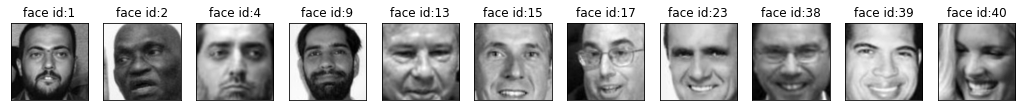

In [66]:
# Show faces of 10 subjects
show_faces_of_n_subject(images = X, subject_ids = [1, 2, 4, 9, 13, 15, 17, 23, 38, 39, 40])

# Machine Learning Model

In [67]:
# We reshape images for machine learning  model
X = data.reshape((data.shape[0], h*w))
print("X shape:",X.shape)

X shape: (569, 262144)


## Split Data 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

print("X_train shape:",X_test.shape)
print("y_train shape:{}".format(y_test.shape))

X_train shape: (398, 262144)
y_train shape:(398,)
X_train shape: (171, 262144)
y_train shape:(171,)


## Principal Component Analysis

In [69]:
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)

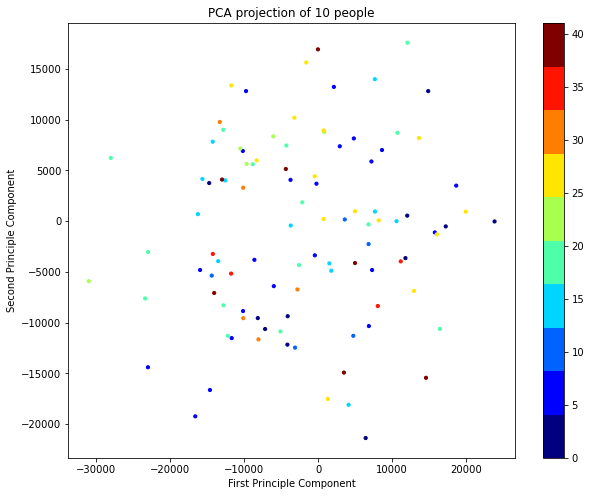

In [70]:
number_of_people = 10
index_range = number_of_people*10
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X_pca[:index_range, 0],
            X_pca[:index_range, 1], 
            c = target[:index_range],
            s = 10,
           cmap = plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

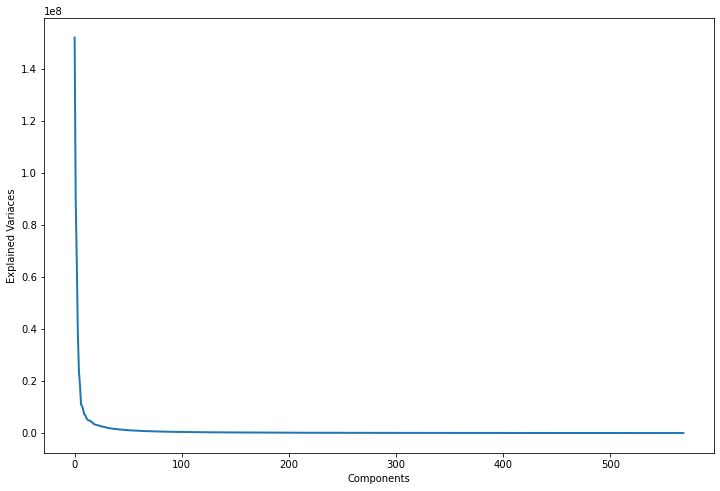

In [71]:
# Finding Optimum Number of Principle Component
pca = PCA()
pca.fit(X)

plt.figure(1, figsize = (12,8))

plt.plot(pca.explained_variance_, linewidth = 2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [72]:
n_components = 200
pca = PCA(n_components = n_components, whiten = True)
pca.fit(X_train)

PCA(n_components=200, whiten=True)

## Show Average Face

Text(0.5, 1.0, 'Average Face')

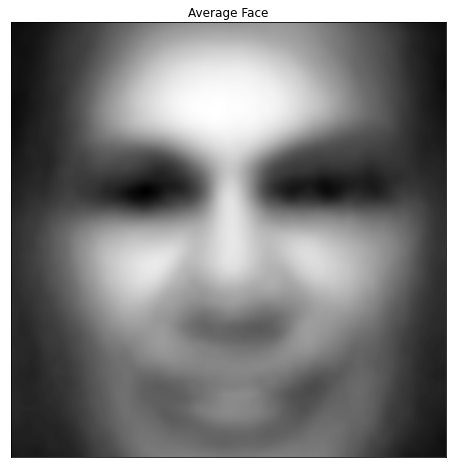

In [73]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(pca.mean_.reshape((512, 512)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

## Show Eigen Faces

Text(0.5, 0.98, 'All Eigen Faces')

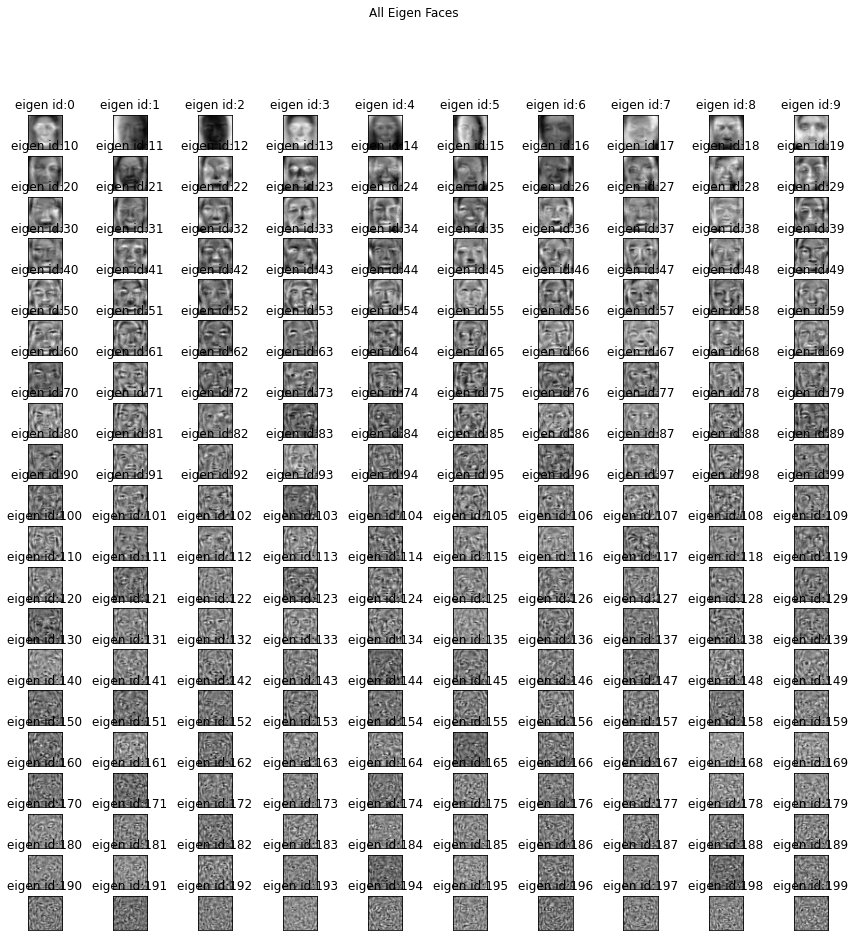

In [74]:
# Get Number of Eigen Faces
number_of_eigenfaces = len(pca.components_)

# Get Eigen Faces
eigen_faces = pca.components_.reshape((number_of_eigenfaces, h, w))

# Plot Eigen Faces
cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap = "gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

## Classification

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)